## Assignment 4 - Health Care Fraud Detection

## Section 1: Data preparation <a class="anchor" id="Section_1"></a>
### Section 1.1: Load Data <a class="anchor" id="Section_11"></a>

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly
import plotly.express as px
import scipy.stats as stats
import plotly.io as pio
pio.renderers.default = "notebook"

Why drop 'Average_Covered_Charges' because it is a claim bill but 'Average Total Payments' is the actual payment. “Average Charges” refers to what the provider bills to Medicare. “Average Total Payments” refers to what Medicare actually pays to the provider as well as co-payment and deductible amounts that the beneficiary is responsible for and payments by third parties for coordination of benefits

In [153]:
data = pd.read_csv("inpatientCharges.csv")
data.columns = ['DRG','Provider_Id', 'Provider_Name','Provider_StreetAddress','Provider_City',
               'Provider_State','Provider_Zipcode','Hospital_referral_region_desp',
                'Total_Discharges','Average_Covered_Charges','Average_Total_Payments',
                'Average_Medicare_Payment']
data = data.drop('Average_Covered_Charges',axis=1)
data.head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,$5777.24,$4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,$5787.57,$4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,$5434.95,$4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,$5417.56,$4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,$5658.33,$4851.44


In [154]:
# Distribution plots of average total payments 
data['Average_Total_Payments'].describe()

count       163065
unique      147842
top       $4370.00
freq             9
Name: Average_Total_Payments, dtype: object

In [155]:
# Change data type and transfer spending amount with dollar sign into numeric
data['DRG'] = data['DRG'].astype('category')
data['Provider_State'] = data['Provider_State'].astype('category')
data['Provider_City'] = data['Provider_City'].astype('category')
data['Provider_Id'] = data['Provider_Id'].astype('category')
data['Hospital_referral_region_desp'] = data['Hospital_referral_region_desp'].astype('category')
data['Average_Total_Payments'] = (data['Average_Total_Payments']
                              .str.replace(r'[^-+\d.]', '').astype(float))
data['Average_Medicare_Payment'] = (data['Average_Medicare_Payment']
                              .str.replace(r'[^-+\d.]', '').astype(float))

data.head()

C:\Users\Jessica\AppData\Local\Temp\ipykernel_4596\1781709075.py:7: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\Jessica\AppData\Local\Temp\ipykernel_4596\1781709075.py:9: FutureWarning:

The default value of regex will change from True to False in a future version.



,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,5777.24,4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,5787.57,4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,5434.95,4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,5417.56,4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,5658.33,4851.44


## Section 2: Distribution plots <a class="anchor" id="Section_2"></a>
### Section 2.1: Distribution of Independent Variables
**Average Total Payments**

I chose average total payment as dependent variable is because it is the actual payment includes beneficiary co-payments, deductible amounts, and any additional payments from third parties for coordination of benefits whereas others do not.

<AxesSubplot:xlabel='Average_Total_Payments'>

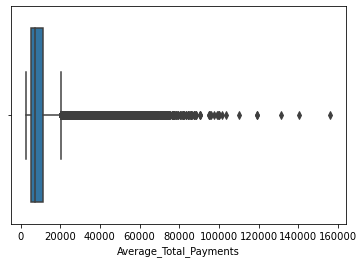

In [156]:
# Distribution plots of average total payments 
sns.boxplot(x = 'Average_Total_Payments', data = data) 

**State Frequency**

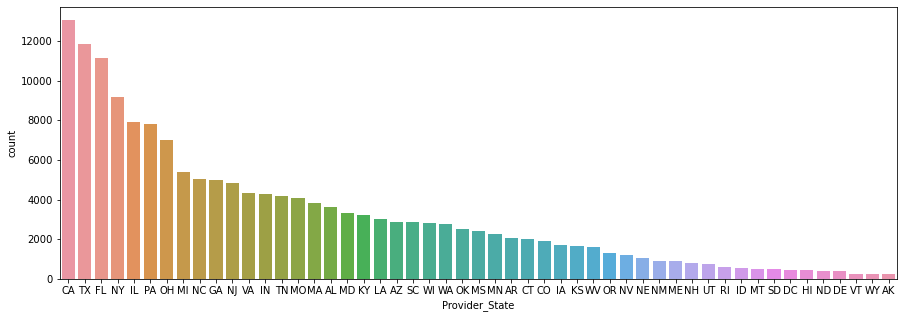

In [157]:
# data['Provider_State'].value_counts()
plt.figure(figsize=(15,5))
sns.countplot(x='Provider_State',data=data,order=data['Provider_State'].value_counts().index)
#plt.xticks(rotation = 90)
#ax = plt.gca()
#for p in ax.patches:
#    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
#            fontsize=12, color='blue', ha='center', va='bottom')
plt.rcParams["axes.labelsize"] = 20

In this datasets, CA, TX, and FL are the states where most the providers located.

**Top 20 cities** <a class="anchor" id="Section_23"></a>

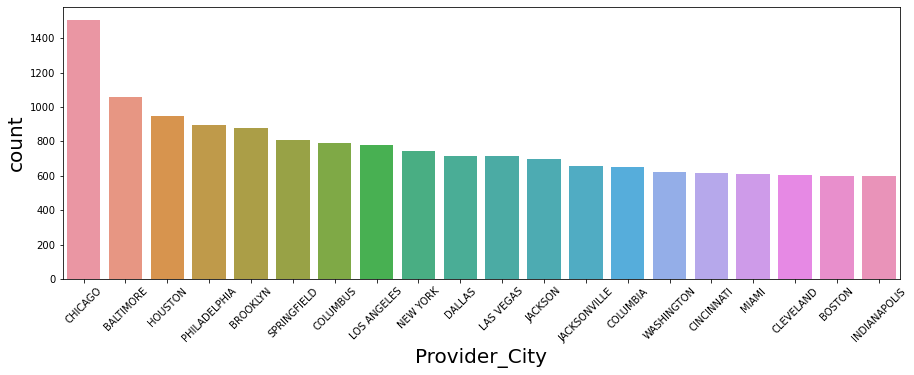

In [158]:
# This will look better
plt.figure(figsize=(15,5))
txt = data['Provider_City'].value_counts()[:20].index

chart = sns.countplot(
    x='Provider_City' ,data=data , order=txt
)

_ = chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.rcParams["axes.labelsize"] = 10

### Section 2.2: Distribution of Dependent Variable by Independent Variables
**Provider State & Total Discharges**

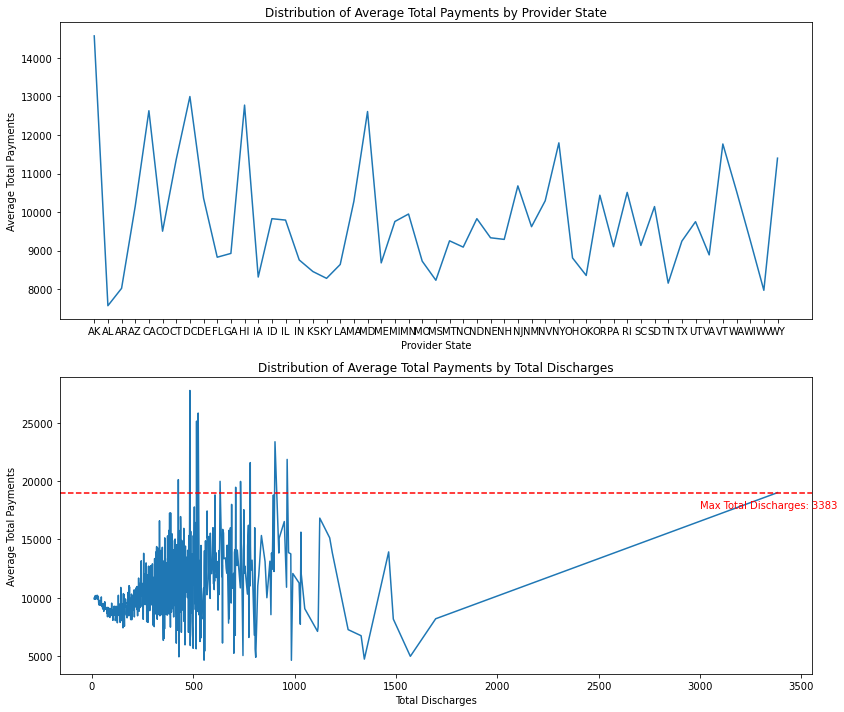

In [159]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

#Provider State
drg_y = data[['Provider_State', 'Average_Total_Payments']]
drg_y = drg_y.groupby('Provider_State')['Average_Total_Payments'].mean().reset_index()
ax1.plot(drg_y['Provider_State'], drg_y['Average_Total_Payments'])
ax1.set_xlabel('Provider State')
ax1.set_ylabel('Average Total Payments')
ax1.set_title('Distribution of Average Total Payments by Provider State')

#Total Discharges
pn_y = data[['Total_Discharges', 'Average_Total_Payments']]
pn_y = pn_y.groupby('Total_Discharges')['Average_Total_Payments'].mean().reset_index()
ax2.plot(pn_y['Total_Discharges'], pn_y['Average_Total_Payments'])
ax2.set_xlabel('Total Discharges')
ax2.set_ylabel('Average Total Payments')
ax2.set_title('Distribution of Average Total Payments by Total Discharges')

## I want to draw a line that (x, y) = (max(total discharges), corresponding y)
max_discharges = data['Total_Discharges'].max()

# Find the corresponding y-value for the maximum Total Discharges
max_payments = pn_y[pn_y['Total_Discharges'] == max_discharges]['Average_Total_Payments'].values[0]

# Add a horizontal line at the corresponding y-value
ax2.axhline(max_payments, color='red', linestyle='--', label='Max Total Discharges')
ax2.text(3000, max_payments-1500, f'Max Total Discharges: {max_discharges}', color='red', va='bottom', ha='left') #f means formatted string literal

plt.tight_layout()
plt.show()

- Alaska is the state has the most average total payments that Medicare pays to the providers based on the distribution of average total payments by provider state line chart.
- The distribution of average total payments by total discharges graph displays a linear trend from 1500 to 3383 units of total discharges. If the average total payments from the maximum total discharge is the benchmark, which I have plotted a red line on it. Then, the outliers present ranges from 500 to 1000 units of total charges. 

**DRG with Mean Average Total Payments**

It is assumed that some DRG treatments do charge higher fee compared to other DRGs. Therefore, I try to plot top 10 mean average total payments amongst DRG to acknowledge which DRG bears the highest mean average total payments.

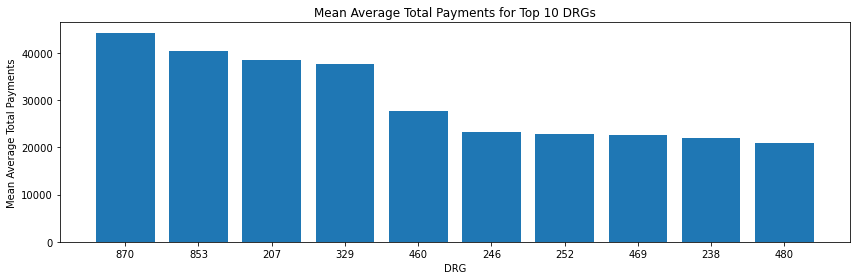

In [160]:
# The sum of Average_Total_Payments for each DRG
data1= data.copy()
data1['DRG'] = data1['DRG'].astype('category').str.extract(r'(\d+)') #only extract the numeric part from the 'DRG' 
drg_avg = data1.groupby('DRG')['Average_Total_Payments'].mean().sort_values(ascending=False)

top_10_drg = drg_avg.head(10)

# Plot the bar chart
plt.figure(figsize=(12,4))
plt.bar(top_10_drg.index, top_10_drg.values)
plt.xlabel('DRG')
plt.ylabel('Mean Average Total Payments')
plt.title('Mean Average Total Payments for Top 10 DRGs')
plt.tight_layout()
plt.show()

870-Septicemia and 853-Infectious & Parasitic diseases have the highest mean average total payments.

**DRG with Variance of Average Total Payments**

We cannot prove that each 870 and 853 DRGs have evenly high average total payments. Hence, to ensure the hospitals do not abuse the resources between them, we need to see the relationship of their average total payments variance. 

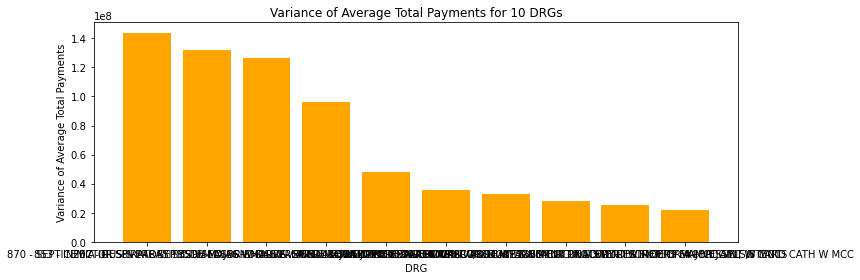

In [161]:
# The variance of Average_Total_Payments for each DRG
drg_avg = data.groupby('DRG')['Average_Total_Payments'].var().sort_values(ascending=False)

top_10_drg = drg_avg.head(10)

# Plot the bar chart
plt.figure(figsize=(12,4))
plt.bar(top_10_drg.index, top_10_drg.values, color='orange')
plt.xlabel('DRG')
plt.ylabel('Variance of Average Total Payments')
plt.title('Variance of Average Total Payments for 10 DRGs')

plt.tight_layout()
plt.show()

Top 5 variance of average total payments among DRGs are the same as the mean average total payments one. Thus, there must be outliers within these DRGs (870/853/207/329/460).

### Section 2.3: Interactions of Independent Variables
**Sum of Total Charges for Top 10 DRGs**

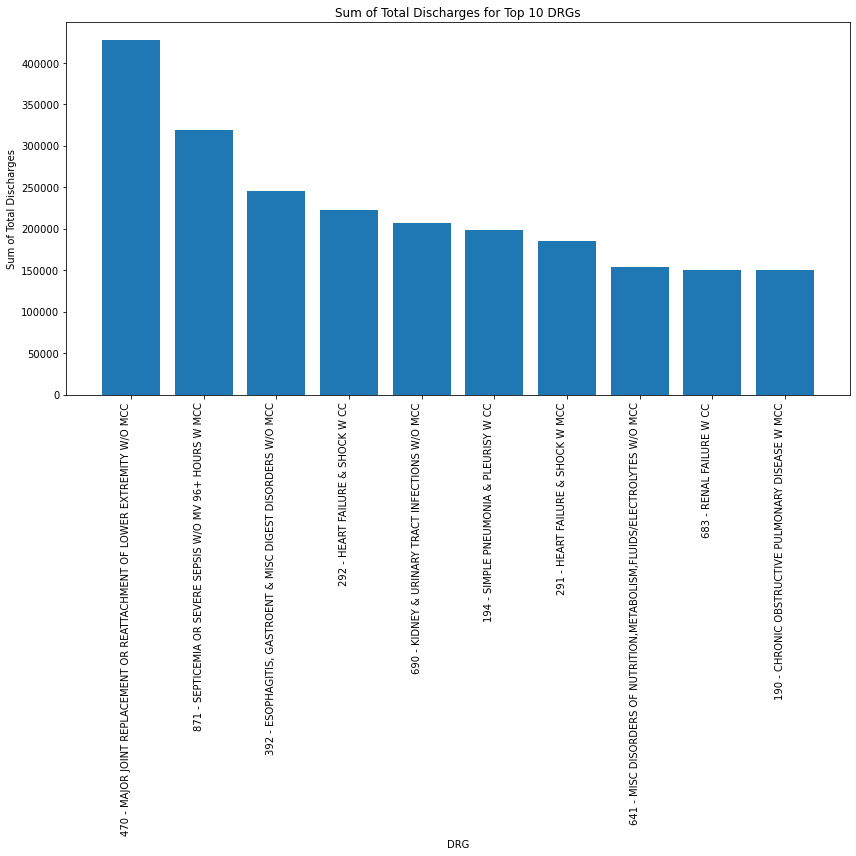

In [162]:
# The sum of total charges for each DRG
var_total_charges = data.groupby('DRG')['Total_Discharges'].sum().sort_values(ascending=False)

# only show top 10 drgs and filter
top_10_drg = var_total_charges.head(10)

# Plot the bar chart
x_ticks = np.arange(len(top_10_drg))
plt.figure(figsize=(12, 12))
plt.bar(x_ticks, top_10_drg.values)
plt.xlabel('DRG')
plt.ylabel('Sum of Total Discharges')
plt.title('Sum of Total Discharges for Top 10 DRGs')

plt.xticks(x_ticks, top_10_drg.index, rotation=90, ha='right')
plt.tight_layout()
plt.show()

470-Major joint replacement and 871-septicemia have the highest total discharges, which could mask some outliers within the discharges.

## Section 3: Feature Engineering <a class="anchor" id="Section_3"></a>

### Section 3.1a DRG's 95% CI of Average Payment <a class="anchor" id="Section_31"></a>
**Assumption: Hospitals may heavily abuse the resources compared to the 95% of its peers of the same DRG.**

In [163]:
grouped = data.groupby(['DRG'])['Average_Total_Payments']
mean = grouped.mean()
std = grouped.std()

# Create a benchmark within 95% of confidence interval
drg_95 = pd.DataFrame({'Mean': mean, 'Std': std})

# add the new feature average spending to the dataset 
drg_95 = data.merge(drg_95, on='DRG', how='left')

drg_95['upper_CI'] = np.where(drg_95['Mean']==0, 0, drg_95['Mean'] + 1.96*drg_95['Std'])
drg_95.head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Mean,Std,upper_CI
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,5777.24,4763.73,6960.534004,1477.873952,9857.166949
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,5787.57,4976.71,6960.534004,1477.873952,9857.166949
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,5434.95,4453.79,6960.534004,1477.873952,9857.166949
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,5417.56,4129.16,6960.534004,1477.873952,9857.166949
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,5658.33,4851.44,6960.534004,1477.873952,9857.166949


In [164]:
#Filter out average total payment is over 95% of the upper confidence interval
outlier = drg_95[(drg_95['Average_Total_Payments']>drg_95['upper_CI']) & (drg_95['upper_CI'] >= 0)] 
filtered_outlier = outlier[['DRG', 'Provider_Name', 'Average_Total_Payments', 'upper_CI']]

filtered_outlier.head()

,DRG,Provider_Name,Average_Total_Payments,upper_CI
31,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,FLAGSTAFF MEDICAL CENTER,11026.33,9857.166949
36,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,SUMMIT HEALTHCARE REGIONAL MEDICAL CENTER,10000.82,9857.166949
67,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,MERCY GENERAL HOSPITAL,10863.22,9857.166949
73,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,GLENDALE MEM HOSPITAL & HLTH CENTER,11082.18,9857.166949
88,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,JOHN MUIR MEDICAL CENTER - WALNUT CREEK CAMPUS,12355.85,9857.166949


### Section 3.1b DRG's of Average Payment <a class="anchor" id="Section_31"></a>
**Assumption: Hospitals may abuse the resources compared to 2 times of average total payments from its peers with the same DRG.**

In [165]:
drg_avg = data.groupby(['DRG'])['Average_Total_Payments'].mean().reset_index()
drg_avg.columns = ['DRG','Avg_Payment_ByStateDRG']

drg_avg = pd.merge(data, drg_avg, how='left', on=['DRG'])
 
drg_avg['drg_avg_ratio'] = np.where(drg_avg['Avg_Payment_ByStateDRG']==0,0, drg_avg['Average_Total_Payments'] / drg_avg['Avg_Payment_ByStateDRG'])
drg_avg['drg_avg_ratio'].describe()

count    163065.000000
mean          1.000000
std           0.248259
min           0.464005
25%           0.839686
50%           0.928391
75%           1.085989
max           9.449417
Name: drg_avg_ratio, dtype: float64

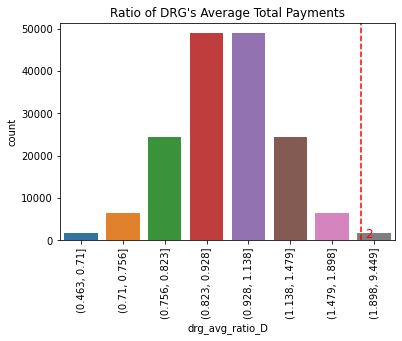

In [166]:
#plot binned values histogram
var = 'drg_avg_ratio'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
drg_avg[binned_var] = pd.qcut(drg_avg[var],percentile)

#Plot the histogram of ratio of amount spending and average total spending
plt.figure(figsize=(6,4))
g = sns.countplot(x="drg_avg_ratio_D", data=drg_avg)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title("Ratio of DRG's Average Total Payments")

plt.axvline(x=6.7, color='red', linestyle='--')
plt.text(6.8, 0.9, '2', color='red', fontsize=12, verticalalignment='bottom')
plt.show()

The chart shows few outliers since the benchmark is set as the DRG's average total payment is over 2 times of mean average total payment so the outliers are located at the right hand side of the red line. Also, the distribution here shows a normal distribution.

### Section 3.1c DRG's of Median Payment <a class="anchor" id="Section_31"></a>
**Assumption: Hospitals may abuse the resources compared to 2 times of median total payments from its peers with the same DRG. Also, median benchmark is somewhat useful compared to average measurement because the outliers could distort the mean values of data.**

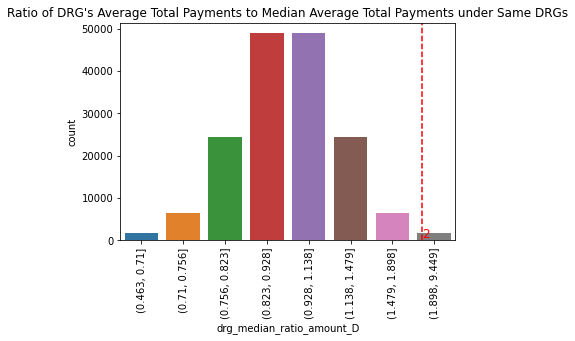

In [178]:
med_drg = data.groupby(['DRG'])['Average_Total_Payments'].mean() 
med_drg = pd.DataFrame(med_drg)
med_drg.columns = ['Median_avg_total_payments']

# add the new feature median spending to the dataset 
med_drg = pd.merge(data, med_drg, how='left', on=['DRG'])

med_drg['drg_median_ratio_amount'] = np.where(med_drg['Median_avg_total_payments']==0,0, med_drg['Average_Total_Payments'] / med_drg['Median_avg_total_payments'])
med_drg['drg_median_ratio_amount'].describe()

#The values spread into a wide range
#cut by percentile for plotting
var = 'drg_median_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
med_drg[binned_var] = pd.qcut(med_drg[var],percentile)

#Plot the histogram of ratio of median average total payments
plt.figure(figsize=(6,4))
g = sns.countplot(x="drg_median_ratio_amount_D", data=med_drg)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title("Ratio of DRG's Average Total Payments to Median Average Total Payments under Same DRGs")

plt.axvline(x=6.7, color='red', linestyle='--')
plt.text(6.7, 0.9, '2', color='red', fontsize=12, verticalalignment='bottom')
plt.show()

### Section 3.2a: State & DRG's 95% CI of Average Payment <a class="anchor" id="Section_31"></a>
**Assumption: Hospitals may abuse the resources compared to the 95% of its peers of the same DRG within the same State.**

In [167]:
state_drg_95 = data.groupby(['DRG', 'Provider_State'])['Average_Total_Payments']
mean = grouped.mean()
std = grouped.std()

# Create a benchmark within 95% of confidence interval
state_drg_95 = pd.DataFrame({'Mean': mean, 'Std': std}).reset_index()

# add the new feature average spending to the dataset 
state_drg_95 = data.merge(state_drg_95, on='DRG', how='left')

state_drg_95['upper_CI'] = np.where(state_drg_95['Mean']==0, 0, state_drg_95['Mean'] + 1.96*state_drg_95['Std'])

#Filter out average total payment is over 95% of the upper confidence interval
outlier = state_drg_95[(state_drg_95['Average_Total_Payments']>state_drg_95['upper_CI']) & (state_drg_95['upper_CI'] >= 0)] 
filtered_outlier = outlier[['DRG', 'Provider_Name', 'Provider_State', 'Average_Total_Payments', 'upper_CI']]

filtered_outlier.tail()

,DRG,Provider_Name,Provider_State,Average_Total_Payments,upper_CI
162822,948 - SIGNS & SYMPTOMS W/O MCC,MEMORIAL HERMANN TEXAS MEDICAL CENTER,TX,7910.32,7474.839233
162893,948 - SIGNS & SYMPTOMS W/O MCC,LAMB HEALTHCARE CENTER,TX,8241.50,7474.839233
162934,948 - SIGNS & SYMPTOMS W/O MCC,MEDICAL COLLEGE OF VIRGINIA HOSPITALS,VA,8760.77,7474.839233
162972,948 - SIGNS & SYMPTOMS W/O MCC,UNIVERSITY OF WASHINGTON MEDICAL CTR,WA,8771.80,7474.839233
163063,948 - SIGNS & SYMPTOMS W/O MCC,TEXAS REGIONAL MEDICAL CENTER AT SUNNYVALE,TX,7663.09,7474.839233


### Section 3.2b: State & DRG's Average Payment <a class="anchor" id="Section_31"></a>
**Assumption: Hospitals may abuse the resources compared to 2 times of average total payments from its peers under the same DRG and State.**

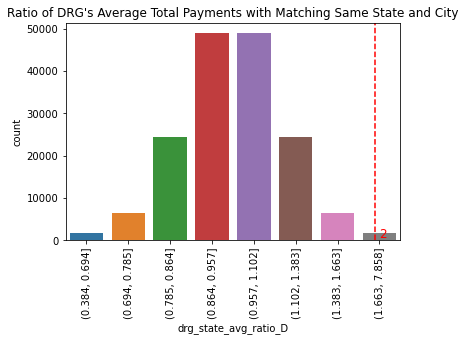

In [168]:
drg_state_avg = data.groupby(['DRG', 'Provider_State'])['Average_Total_Payments'].mean().reset_index()
drg_state_avg.head()
drg_state_avg.columns = ['DRG', 'Provider_State', 'drg_state_avg_total_payment']

drg_state_avg = pd.merge(data, drg_state_avg, how='left', left_on=['DRG', 'Provider_State'], right_on = ['DRG', 'Provider_State'])
 
drg_state_avg['drg_state_avg_ratio'] = np.where(drg_state_avg['drg_state_avg_total_payment']==0,0, drg_state_avg['Average_Total_Payments'] / drg_state_avg['drg_state_avg_total_payment'])

#plot binned values histogram
var = 'drg_state_avg_ratio'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
drg_state_avg[binned_var] = pd.qcut(drg_state_avg[var],percentile)

#Plot the histogram of ratio of amount spending and average total spending 
plt.figure(figsize=(6,4))
g = sns.countplot(x="drg_state_avg_ratio_D", data=drg_state_avg)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title("Ratio of DRG's Average Total Payments with Matching Same State and City")

plt.axvline(x=6.9, color='red', linestyle='--')
plt.text(7, 0.9, '2', color='red', fontsize=12, verticalalignment='bottom')
plt.show()


The chart also shows few outliers located at the right hand side of the red line while further matching hospitals' state and DRG clinical condition. Also, the distribution here shows a normal distribution.

### Section 3.2c State and DRG's of Median Average Total Payment <a class="anchor" id="Section_31"></a>
**Assumption: Hospitals may abuse the resources compared to 2 times of median total payments from its peers under the same DRG within same state.**

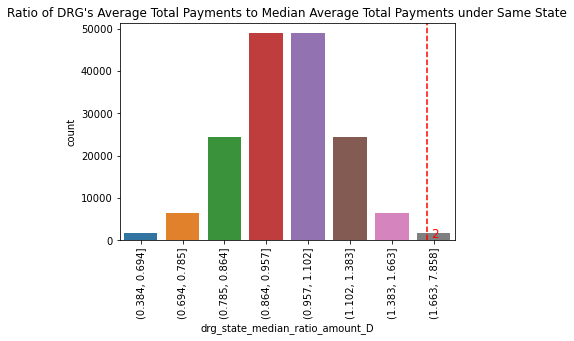

In [183]:
med_drg_state = data.groupby(['DRG', 'Provider_State'])['Average_Total_Payments'].mean() 
med_drg_state = pd.DataFrame(med_drg_state)
med_drg_state.columns = ['Median_avg_total_payments']

# add the new feature median spending to the dataset 
med_drg_state = pd.merge(data, med_drg_state, how='left', on=['DRG', 'Provider_State'])

med_drg_state['drg_state_median_ratio_amount'] = np.where(med_drg_state['Median_avg_total_payments']==0,0, med_drg_state['Average_Total_Payments'] / med_drg_state['Median_avg_total_payments'])
med_drg_state['drg_state_median_ratio_amount'].describe()

#The values spread into a wide range
#cut by percentile for plotting
var = 'drg_state_median_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
med_drg_state[binned_var] = pd.qcut(med_drg_state[var],percentile)

#Plot the histogram of ratio of median average total payments
plt.figure(figsize=(6,4))
g = sns.countplot(x="drg_state_median_ratio_amount_D", data=med_drg_state)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title("Ratio of DRG's Average Total Payments to Median Average Total Payments under Same State")

plt.axvline(x=6.85, color='red', linestyle='--')
plt.text(6.95, 0.9, '2', color='red', fontsize=12, verticalalignment='bottom')
plt.show()

### Section 3.3a: Hospital_referral_region_desp's 95% CI of Average Total Payment <a class="anchor" id="Section_31"></a>
**Assumption: Hospitals may abuse the resources compared to the 95% of average total payments from its peers in the same region.**

In [169]:
grouped = data.groupby(['Hospital_referral_region_desp'])['Average_Total_Payments']
mean = grouped.mean()
std = grouped.std()

# Create a benchmark within 95% of confidence interval
hos_region_95 = pd.DataFrame({'Mean': mean, 'Std': std}).reset_index()
hos_region_95.head()
# add the new feature average spending to the dataset 
hos_region_95 = data.merge(hos_region_95, on='Hospital_referral_region_desp', how='left')

hos_region_95['upper_CI'] = np.where(hos_region_95['Mean']==0, 0, hos_region_95['Mean'] + 1.96*hos_region_95['Std'])

#Filter out average total payment is over 95% of the upper confidence interval
outlier = hos_region_95[(hos_region_95['Average_Total_Payments']>hos_region_95['upper_CI']) & (hos_region_95['upper_CI'] >= 0)] 
filtered_outlier = outlier[['Provider_Name', 'Hospital_referral_region_desp', 'Average_Total_Payments', 'upper_CI']]

filtered_outlier.tail()

,Provider_Name,Hospital_referral_region_desp,Average_Total_Payments,upper_CI
154595,UNIVERSITY OF TEXAS MEDICAL BRANCH GAL,TX - Houston,28615.63,24608.650047
154837,MEDICAL COLLEGE OF VIRGINIA HOSPITALS,VA - Richmond,28604.07,25314.772289
154950,ST JOSEPHS HEALTHCARE SYSTEM,WV - Charleston,20435.93,17894.178616
159452,UNIVERSITY OF MICHIGAN HEALTH SYSTEM,MI - Ann Arbor,33251.14,27827.030713
162713,CANCER TREATMENT CENTERS OF AMERICA,PA - Philadelphia,28968.20,26668.033820


### Section 3.3b: Hospital_referral_region_desp's Average Total Payment
**Assumpton: Hospitals may abuse the resources compared to 2 times of average total payments from its peers in the same region.**

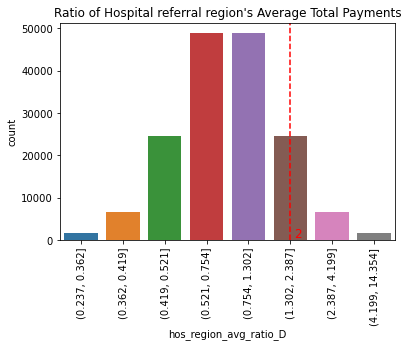

In [170]:
hos_region_avg = data.groupby(['Hospital_referral_region_desp'])['Average_Total_Payments'].mean().reset_index()
hos_region_avg.columns = ['Hospital_referral_region_desp','hos_region_avg_total_payment']

hos_region_avg = pd.merge(data, hos_region_avg, how='left', on=['Hospital_referral_region_desp'])
 
hos_region_avg['hos_region_avg_ratio'] = np.where(hos_region_avg['hos_region_avg_total_payment']==0,0, hos_region_avg['Average_Total_Payments'] / hos_region_avg['hos_region_avg_total_payment'])

#plot binned values histogram
var = 'hos_region_avg_ratio'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
hos_region_avg[binned_var] = pd.qcut(hos_region_avg[var],percentile)

#Plot the histogram of ratio of amount spending and average total spending
plt.figure(figsize=(6,4))
g = sns.countplot(x="hos_region_avg_ratio_D", data=hos_region_avg)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title("Ratio of Hospital referral region's Average Total Payments")

plt.axvline(x=5, color='red', linestyle='--')
plt.text(5.1, 0.9, '2', color='red', fontsize=12, verticalalignment='bottom')
plt.show()

The outliers are basically located at the right hand side of the red line while further matching hospitals' region. Also, the distribution here shows a normal distribution.

### Section 3.3c Hospital_referral_region_desp's of Median Average Total Payment <a class="anchor" id="Section_31"></a>
**Assumption: Hospitals may abuse the resources compared to 2 times of median total payments from its peers in the same region.**

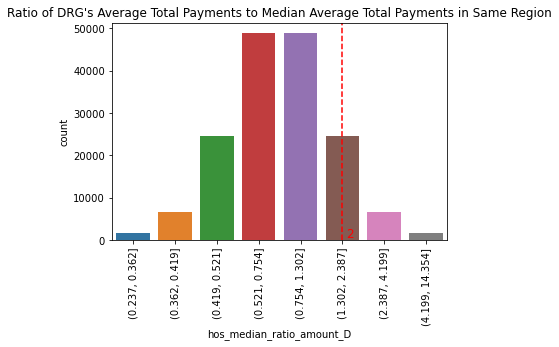

In [187]:
med_hos = data.groupby(['Hospital_referral_region_desp'])['Average_Total_Payments'].mean() 
med_hos = pd.DataFrame(med_hos)
med_hos.columns = ['Median_avg_total_payments']

# add the new feature median spending to the dataset 
med_hos = pd.merge(data, med_hos, how='left', on=['Hospital_referral_region_desp'])

med_hos['hos_median_ratio_amount'] = np.where(med_hos['Median_avg_total_payments']==0,0, med_hos['Average_Total_Payments'] / med_hos['Median_avg_total_payments'])
med_hos['hos_median_ratio_amount'].describe()

#The values spread into a wide range
#cut by percentile for plotting
var = 'hos_median_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
med_hos[binned_var] = pd.qcut(med_hos[var],percentile)

#Plot the histogram of ratio of median average total payments
plt.figure(figsize=(6,4))
g = sns.countplot(x="hos_median_ratio_amount_D", data=med_hos)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title("Ratio of DRG's Average Total Payments to Median Average Total Payments in Same Region")

plt.axvline(x=5, color='red', linestyle='--')
plt.text(5.1, 0.9, '2', color='red', fontsize=12, verticalalignment='bottom')
plt.show()

### Section 3.4a: Total Discharges over 95% of Average Total Payments
**Assumpton: If the total discharges are comparably low but the average payment is higher than 95% of confidence interval, the fraudulent transaction might happen.**

The total discharges indicate the number of beneficiaries who were released from the inpatient hospital after receiving care.

In [171]:
grouped = data.groupby(['Total_Discharges'])['Average_Total_Payments']
mean = grouped.mean()
std = grouped.std()

# Create a benchmark within 95% of confidence interval
dis_95 = pd.DataFrame({'Mean': mean, 'Std': std})

# add the new feature average spending to the dataset 
dis_95 = data.merge(dis_95, on='Total_Discharges', how='left')

dis_95['upper_CI'] = np.where(dis_95['Mean']==0, 0, dis_95['Mean'] + 1.96*dis_95['Std'])

#Filter out average total payment is over 95% of the upper confidence interval
outlier = dis_95[(dis_95['Average_Total_Payments']>dis_95['upper_CI']) & (dis_95['upper_CI'] >= 0)] 
filtered_outlier = outlier[['Provider_Name', 'Total_Discharges', 'Average_Total_Payments', 'upper_CI']]

filtered_outlier.head()

,Provider_Name,Total_Discharges,Average_Total_Payments,upper_CI
1554,"JOHNS HOPKINS HOSPITAL, THE",83,24865.61,21460.955088
1566,JOHNS HOPKINS BAYVIEW MEDICAL CENTER,103,19700.60,15601.612665
2384,COMMUNITY REGIONAL MEDICAL CENTER,107,18392.02,18119.595713
2420,JOHN MUIR MEDICAL CENTER - WALNUT CREEK CAMPUS,72,24440.79,21398.792999
2422,WASHINGTON HOSPITAL,50,22851.80,22057.377241


### Section 3.4b: Total Discharges over mean average total payments
**Assumpton: If the total discharges are comparably low but the average payment is higher than 2 times of average, the fraudulent transaction might happen.**

The total discharges indicate the number of beneficiaries who were released from the inpatient hospital after receiving care.

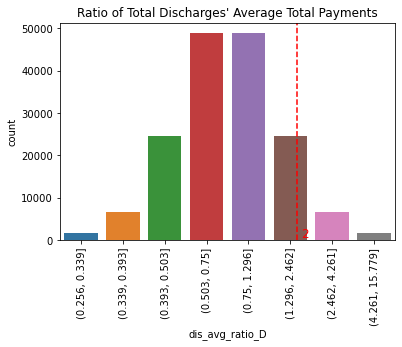

In [172]:
dis_avg = data.groupby(['Total_Discharges'])['Average_Total_Payments'].mean().reset_index()
dis_avg.head()
dis_avg.columns = ['Total_Discharges', 'dis_avg_total_payment']

dis_avg = pd.merge(data, dis_avg, how='left', on=['Total_Discharges'])
 
dis_avg['dis_avg_ratio'] = np.where(dis_avg['dis_avg_total_payment']==0,0, dis_avg['Average_Total_Payments'] / dis_avg['dis_avg_total_payment'])

#plot binned values histogram
var = 'dis_avg_ratio'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
dis_avg[binned_var] = pd.qcut(dis_avg[var],percentile)

#Plot the histogram of ratio of amount spending and average total spending
plt.figure(figsize=(6,4))
g = sns.countplot(x="dis_avg_ratio_D", data=dis_avg)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title("Ratio of Total Discharges' Average Total Payments")

plt.axvline(x=5.15, color='red', linestyle='--')
plt.text(5.25, 0.9, '2', color='red', fontsize=12, verticalalignment='bottom')
plt.show()

### Section 3.4c Total Discharges over Median Average Total Payment <a class="anchor" id="Section_31"></a>
**Assumption: Hospitals may abuse the resources compared to 2 times of median total payments compared to same level of total discharges**

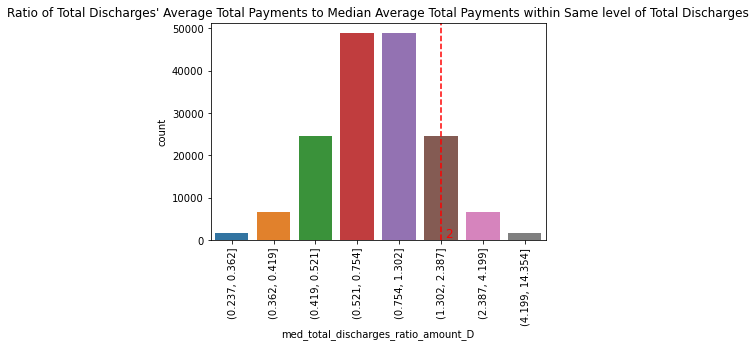

In [188]:
med_total_discharges = data.groupby(['Total_Discharges'])['Average_Total_Payments'].mean() 
med_total_discharges = pd.DataFrame(med_total_discharges)
med_total_discharges.columns = ['Median_avg_total_payments']

# add the new feature median spending to the dataset 
med_total_discharges = pd.merge(data, med_total_discharges, how='left', on=['Total_Discharges'])

med_total_discharges['med_total_discharges_ratio_amount'] = np.where(med_hos['Median_avg_total_payments']==0,0, med_hos['Average_Total_Payments'] / med_hos['Median_avg_total_payments'])
med_total_discharges['med_total_discharges_ratio_amount'].describe()

#The values spread into a wide range
#cut by percentile for plotting
var = 'med_total_discharges_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
med_total_discharges[binned_var] = pd.qcut(med_total_discharges[var],percentile)

#Plot the histogram of ratio of median average total payments
plt.figure(figsize=(6,4))
g = sns.countplot(x="med_total_discharges_ratio_amount_D", data=med_total_discharges)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title("Ratio of Total Discharges' Average Total Payments to Median Average Total Payments within Same level of Total Discharges")

plt.axvline(x=5, color='red', linestyle='--')
plt.text(5.1, 0.9, '2', color='red', fontsize=12, verticalalignment='bottom')
plt.show()

### Section 3.5a: Provider name's 95% CI of Average Total Payment <a class="anchor" id="Section_31"></a>
**Assumption: Hospitals may abuse the resources compared to the 95% of average total payments from its own average total payment.**

In [173]:
grouped = data.groupby(['Provider_Name'])['Average_Total_Payments']
mean = grouped.mean()
std = grouped.std()

# Create a benchmark within 95% of confidence interval
name_95 = pd.DataFrame({'Mean': mean, 'Std': std}).reset_index()
name_95.head()
# add the new feature average spending to the dataset 
name_95 = data.merge(name_95, on='Provider_Name', how='left')

name_95['upper_CI'] = np.where(name_95['Mean']==0, 0, name_95['Mean'] + 1.96*name_95['Std'])

#Filter out average total payment is over 95% of the upper confidence interval
outlier = name_95[(name_95['Average_Total_Payments']>name_95['upper_CI']) & (name_95['upper_CI'] >= 0)] 
filtered_outlier = outlier[['Provider_Id', 'Provider_Name', 'Provider_State', 'Average_Total_Payments', 'upper_CI']]

filtered_outlier.tail()

,Provider_Id,Provider_Name,Provider_State,Average_Total_Payments,upper_CI
154962,510082,SUMMERSVILLE REGIONAL MEDICAL CENTER,WV,11358.28,11318.413858
155021,520204,"WHEATON FRANCISCAN HEALTHCARE- FRANKLIN, INC",WI,11828.43,10893.517928
155024,530002,CAMPBELL COUNTY MEMORIAL HOSPITAL,WY,19201.38,18760.738641
155028,670002,SOUTH HAMPTON COMMUNITY HOSPITAL,TX,13671.91,13624.569648
155043,670060,TEXAS REGIONAL MEDICAL CENTER AT SUNNYVALE,TX,18468.00,18437.346165


### Section 3.5b: Provider name's Mean Average Total Payment
**Assumpton: Hospitals may abuse the resources compared to 2 times of average total payments from its own average total payment.**

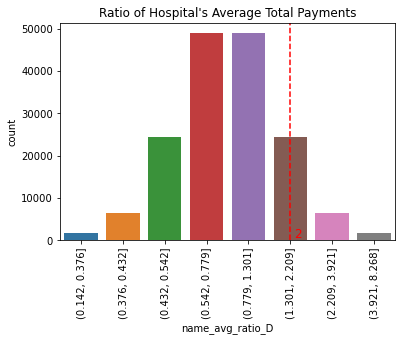

In [174]:
name_avg = data.groupby(['Provider_Name'])['Average_Total_Payments'].mean().reset_index()
name_avg.columns = ['Provider_Name','name_avg_total_payment']

name_avg = pd.merge(data, name_avg, how='left', on=['Provider_Name'])
 
name_avg['name_avg_ratio'] = np.where(name_avg['name_avg_total_payment']==0,0, name_avg['Average_Total_Payments'] / name_avg['name_avg_total_payment'])

#plot binned values histogram
var = 'name_avg_ratio'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
name_avg[binned_var] = pd.qcut(name_avg[var],percentile)

#Plot the histogram of ratio of amount spending and total average spending
plt.figure(figsize=(6,4))
g = sns.countplot(x="name_avg_ratio_D", data=name_avg)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title("Ratio of Hospital's Average Total Payments")

plt.axvline(x=5, color='red', linestyle='--')
plt.text(5.1, 0.9, '2', color='red', fontsize=12, verticalalignment='bottom')
plt.show()

### Section 3.5c Provider Name's Median Average Total Payment <a class="anchor" id="Section_31"></a>
**Assumption: Hospitals may abuse the resources compared to 2 times of median total payments under same provider.**

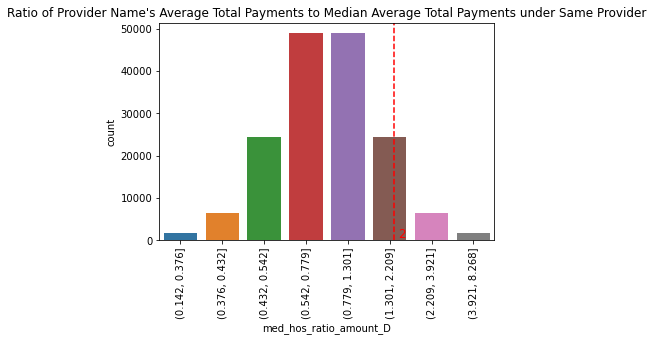

In [191]:
med_hos = data.groupby(['Provider_Name'])['Average_Total_Payments'].mean() 
med_hos = pd.DataFrame(med_hos)
med_hos.columns = ['Median_avg_total_payments']

# add the new feature median spending to the dataset 
med_hos = pd.merge(data, med_hos, how='left', on=['Provider_Name'])

med_hos['med_hos_ratio_amount'] = np.where(med_hos['Median_avg_total_payments']==0,0, med_hos['Average_Total_Payments'] / med_hos['Median_avg_total_payments'])
med_hos['med_hos_ratio_amount'].describe()

#The values spread into a wide range
#cut by percentile for plotting
var = 'med_hos_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
med_hos[binned_var] = pd.qcut(med_hos[var],percentile)

#Plot the histogram of ratio of median average total payments
plt.figure(figsize=(6,4))
g = sns.countplot(x="med_hos_ratio_amount_D", data=med_hos)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title("Ratio of Provider Name's Average Total Payments to Median Average Total Payments under Same Provider")

plt.axvline(x=5.1, color='red', linestyle='--')
plt.text(5.2, 0.9, '2', color='red', fontsize=12, verticalalignment='bottom')
plt.show()